In [1]:
from fastai.vision.widgets import *
from fastcore.all import *
from duckduckgo_search import ddg_images

In [2]:
# Return a list of urls of the searched images
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
terms = ['labrador', 'golden retriever']
path = Path('data')

In [10]:
from time import sleep
from fastai.vision.all import *

/Users/jerryyu/opt/anaconda3/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/jerryyu/opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so, 6): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: /Users/jerryyu/opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so
  Expected in: /Users/jerryyu/opt/anaconda3/lib/python3.8/site-packages/torch/lib/libtorch_cpu.dylib
 in /Users/jerryyu/opt/anaconda3/lib/python3.8/site-packages/torchvision/image.so
  warn(f"Failed to load image Python extension: {e}")


In [11]:
for term in terms:
    dest = path/term
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(term + ' photo' ))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(dest, max_size=400, dest=dest)

Searching for 'labradorphoto'
Searching for 'golden retrieverphoto'


In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [16]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=35),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()).dataloaders(path, bs=5)

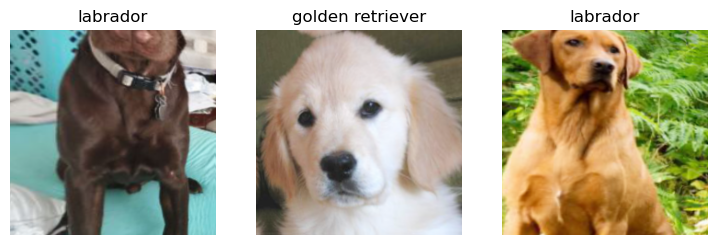

In [17]:
dls.show_batch(max_n=3)

In [19]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.655228,0.151553,0.000000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.596008,0.098839,0.000000,00:08
1,0.367000,0.037378,0.000000,00:08
2,0.252290,0.011445,0.000000,00:07
3,0.323496,0.021376,0.000000,00:06
4,0.352060,0.017187,0.000000,00:06


In [20]:
learn.export('model.pkl')

In [41]:
import test

In [42]:
test.test()

test
